# Escalamiento Multidimensional

## Realizado por: Pablo Sánchez Cabrera

In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.manifold import MDS
from sklearn.manifold import smacof
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

## Ejemplo 1 - MDS Clásico

Se cargan los datos desde la siguiente url: https://media.githubusercontent.com/media/neurospin/pystatsml/master/datasets/eurodist.csv

In [3]:
url = 'https://media.githubusercontent.com/media/neurospin/pystatsml/master/datasets/eurodist.csv'
eurodist = pd.read_csv(url)
eurodist

,city,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
0,Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
1,Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
2,Brussels,2963,1318,0,204,583,206,966,677,2256,...,2084,690,1558,1011,925,747,285,1511,1616,1175
3,Calais,3175,1326,204,0,460,409,1136,747,2224,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
4,Cherbourg,3339,1294,583,460,0,785,1545,853,2047,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588
5,Cologne,2762,1498,206,409,785,0,760,1662,2436,...,2290,714,1764,1035,911,583,465,1497,1403,937
6,Copenhagen,3276,2218,966,1136,1545,760,0,1418,3196,...,2971,1458,2498,1778,1537,1104,1176,2050,650,1455
7,Geneva,2610,803,677,747,853,1662,1418,0,1975,...,1936,158,1439,425,328,591,513,995,2068,1019
8,Gibraltar,4485,1172,2256,2224,2047,2436,3196,1975,0,...,676,1817,698,1693,2185,2565,1971,2631,3886,2974
9,Hamburg,2977,2018,597,714,1115,460,460,1118,2897,...,2671,1159,2198,1479,1238,805,877,1751,949,1155


Nótese que los datos a utilizar son directamente la matriz de distancias

Se define y se ajusta el modelo con 2 componentes. Asimismo, hay que tener en cuenta que:
- `metric`: como `True` pues se realiza un MDS métrico (por defecto)
- `dissimilarity`: como `precomputed` porque se dispone del valor de la distancia

In [5]:
mds = MDS(metric=True, dissimilarity='precomputed', n_components=2, random_state=40, max_iter=500, eps=0.001)

# Ajuste del modelo teniendo en cuenta la distancia
euro_city = eurodist.iloc[:, 1:] # matriz de distancia -> se elimina el nombre de las ciudades
X = mds.fit_transform(euro_city) # aplicación del modelo -> coordenadas en las nuevas dimensiones

Una vez se aplica el modelo se visualizan los resultados

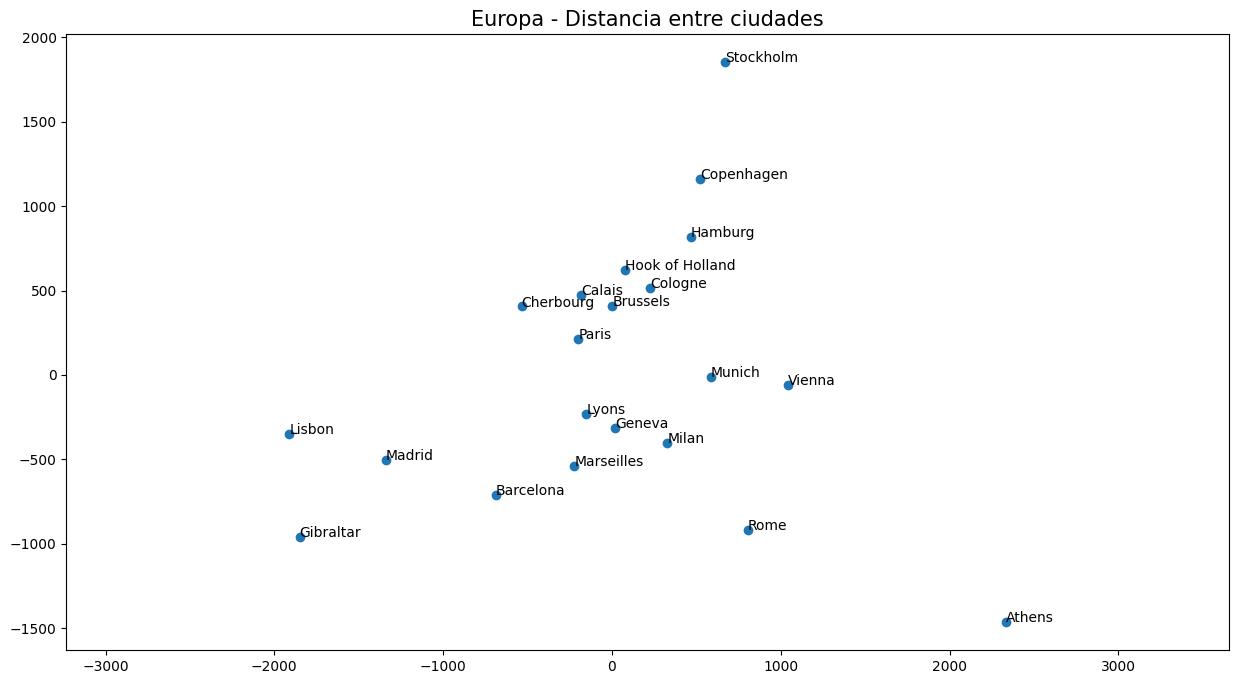

In [6]:
#Rotación
theta = np.pi/3  # 60 grados
rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])  #rotación - transformación ortogonal
Xrot=np.dot(X,rot) # aplicación de la rotación

# Coordenadas del mapa
x = -Xrot[:,0] # -x
y = Xrot[:,1]

plt.figure(figsize=(15,8)) 
plt.scatter(x,y)

for i in range(len(eurodist['city'])):
    plt.text(x[i], y[i], eurodist['city'][i])
    
plt.axis('equal')
plt.title('Europa - Distancia entre ciudades', fontsize=15)
plt.show()

Destacar que para conseguir una representación "similar" a la del mapa europeo es necesario rotar la solución proporcionada por el algoritmo.

## Ejemplo 2 - Algoritmo SMACOF

Se cargan los datos de `swiss`. Estos datos están ya disponibles en la librería **statsmodels**.

In [7]:
swiss = sm.datasets.get_rdataset("swiss", "datasets", cache=True).data
swiss = swiss.iloc[:, 1:] #se elimina la primera variable - Fertilidad
swiss.head()

,Agriculture,Examination,Education,Catholic,Infant.Mortality
rownames,,,,,
Courtelary,17.0,15,12,9.96,22.2
Delemont,45.1,6,9,84.84,22.2
Franches-Mnt,39.7,5,5,93.40,20.2
Moutier,36.5,12,7,33.77,20.3
Neuveville,43.5,17,15,5.16,20.6


En primer lugar, se calcula la matriz de distancias:

In [10]:
data = np.matrix(swiss)
dist = pd.DataFrame(squareform(pdist(data, metric='euclidean')), columns=swiss.index, index=swiss.index)
dist

rownames,Courtelary,Delemont,Franches-Mnt,Moutier,Neuveville,Porrentruy,Broye,Glane,Gruyere,Sarine,...,Sion,Boudry,La Chauxdfnd,Le Locle,Neuchatel,Val de Ruz,ValdeTravers,V. De Geneve,Rive Droite,Rive Gauche
rownames,,,,,,,,,,,,,,,,,,,,,
Courtelary,0.000000,80.539583,87.352868,31.381142,27.218560,83.145788,98.635451,101.038458,95.111377,86.204967,...,98.455152,24.523572,17.350761,7.909968,29.145181,21.888355,11.700261,58.997834,53.103492,52.920288
Delemont,80.539583,0.000000,11.110068,52.208380,80.690907,12.697752,28.286571,27.191219,16.531452,12.791466,...,23.442912,82.056739,83.562866,80.680570,82.097603,80.779372,82.910591,81.535882,41.258915,40.865023
Franches-Mnt,87.352868,11.110068,0.000000,60.158016,89.693353,9.398346,32.666688,30.262809,16.026007,15.393843,...,26.300854,90.537442,89.296372,87.391318,89.299722,89.041085,89.599400,86.152270,50.941446,47.325626
Moutier,31.381142,52.208380,60.158016,0.000000,30.929308,57.239584,68.213096,70.881183,66.075260,58.850761,...,68.745644,31.890947,39.162232,32.225805,42.454947,28.978268,33.428946,63.763821,29.731727,35.575745
Neuveville,27.218560,80.690907,89.693353,30.929308,0.000000,86.753145,92.067508,95.556161,93.505615,86.349397,...,93.881835,10.784786,38.937474,28.050911,37.787135,10.159040,27.503274,70.868910,47.557785,57.440220
Porrentruy,83.145788,12.697752,9.398346,57.239584,86.753145,0.000000,35.793972,33.594168,20.365903,13.729752,...,30.598654,87.062061,84.321637,83.106393,83.973642,86.094193,85.398222,80.392182,48.399066,42.467253
Broye,98.635451,28.286571,32.666688,68.213096,92.067508,35.793972,0.000000,5.570108,18.209953,25.764334,...,11.895394,93.574585,101.741553,98.080563,97.562723,93.806260,99.195262,99.501860,53.568427,59.467389
Glane,101.038458,27.191219,30.262809,70.881183,95.556161,33.594168,5.570108,0.000000,15.189473,23.946156,...,9.717968,97.082911,103.999649,100.607622,99.895483,97.144460,101.960728,100.211788,55.884013,60.432929
Gruyere,95.111377,16.531452,16.026007,66.075260,93.505615,20.365903,18.209953,15.189473,0.000000,12.989769,...,11.922902,94.428293,97.059077,94.623319,94.620571,94.073269,96.400054,92.335361,52.766918,52.819368


`Comparativa MDS clásico con SMACOF`

Se emplea la evolución del valor de `stress` según la dimensión para llevar a cabo la comparativa.

In [11]:
n = 4 #dimensión a elegir por usuario -> criterio parada del bucle 
k_range = range(1, min(n, dist.shape[0]-1))  #máxima dimensión a usar en el bucle
num = 40 #número aleatrio

# Modelo Clásico
stress = [MDS(dissimilarity='precomputed', n_components=k, metric=True, random_state=num).fit(dist).stress_ for k in k_range]

# Algoritmo SMACOF
stress_smacof = [smacof(dissimilarities=dist, metric=True, n_components=k, random_state=num)[1] for k in k_range]

In [ ]:
Tras realizar los dos modelos se obtiene el gráfico de `Scree Plot` y se estudia la métrica de `stress`

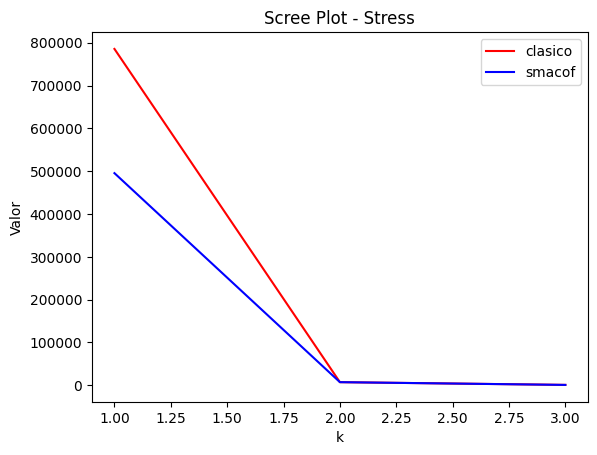

Stress_Clásico: [785611.0273458499, 7148.163158930965, 798.7959575042291]
Stress_Smacof: [495429.78891633474, 7148.163158930965, 697.8282648363846]


In [12]:
fig=plt.subplots()

plt.plot(k_range, stress, label='clasico', color='red'), plt.legend(loc='upper right') #mds clásico
plt.plot(k_range, stress_smacof, label='smacof', color='blue'), plt.legend(loc='upper right') #mds smacof
plt.title('Scree Plot - Stress')
plt.xlabel('k')
plt.ylabel('Valor')


plt.show()

# Valor del stress por componente y modelo
print(f'Stress_Clásico: {stress}')
print(f'Stress_Smacof: {stress_smacof}')

Puede verse que eligiendo dos dimensiones se obtiene mismo valor de Stress en ambos modelos

### Algoritmo SMACOF

Finalmente, se obtiene el modelo final

In [13]:
mds_smacof = smacof(dissimilarities=dist, metric=True, n_components=2, random_state=num, return_n_iter=True)

#Valor del stress y número de iteraciones en el que es conseguido
print(f'Stress: {round(mds_smacof[1],3)}')
print(f'N_iter: {mds_smacof[2]}')

Stress: 7148.163
N_iter: 62


`Coordenadas en las nuevas dimensiones`

Se visualizan solo los primeros y últimos 5 registros

In [16]:
coord=pd.DataFrame(mds_smacof[0], columns=['Dim1', 'Dim2'], index=swiss.index)

In [17]:
coord.head()

,Dim1,Dim2
rownames,,
Courtelary,-44.844800,7.803297
Delemont,34.903648,28.096565
Franches-Mnt,39.986823,38.203421
Moutier,-12.148402,5.559224
Neuveville,-33.722508,-14.001418


In [18]:
coord.tail()

,Dim1,Dim2
rownames,,
Val de Ruz,-37.203618,-11.765442
ValdeTravers,-46.738038,5.151957
V. De Geneve,-34.999227,58.791911
Rive Droite,3.133664,15.269955
Rive Gauche,-1.496954,34.054032


`Visualización de las coordenadas en las 2 dimensiones`

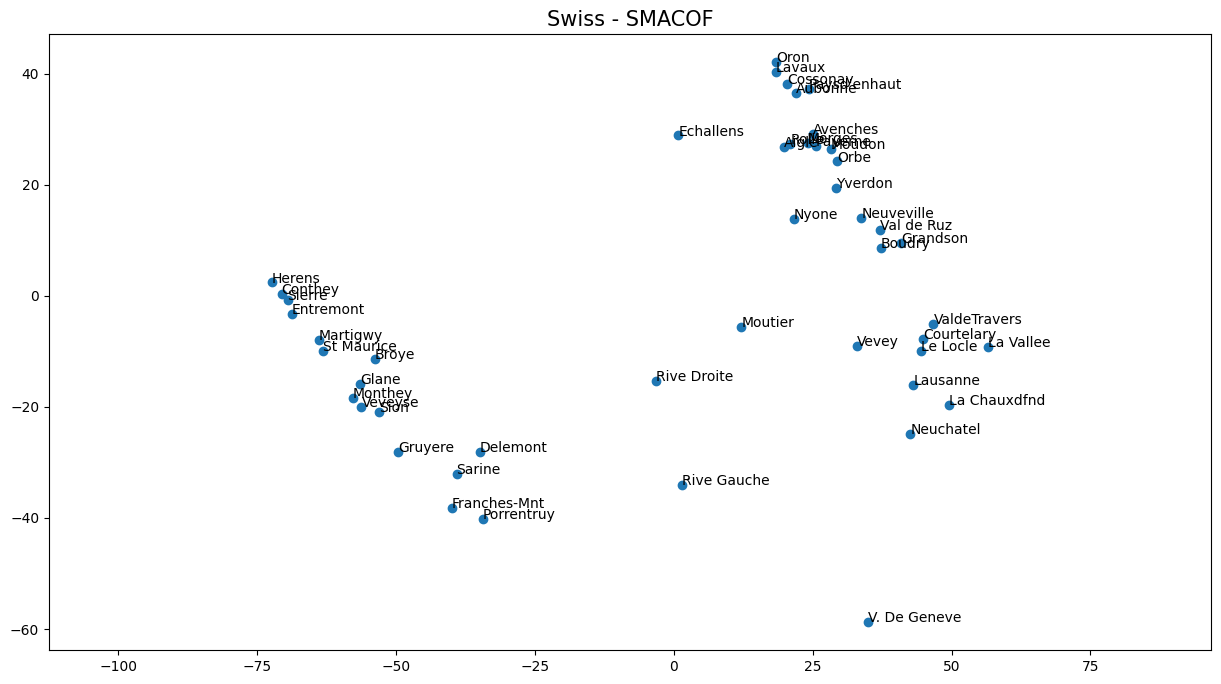

In [20]:
x = -np.array(coord['Dim1'])
y = -np.array(coord['Dim2'])

plt.figure(figsize=(15,8)) 
plt.scatter(x,y)

for i in range(len(coord.index)):
    plt.text(x[i], y[i], coord.index[i])
    
plt.axis('equal')
plt.title('Swiss - SMACOF', fontsize=15)
plt.show()